In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
#Abrimos sin index_col

In [5]:
df_vuelos=pd.read_csv("Customer Flight Activity.csv")

In [6]:
df_datos= pd.read_csv("Customer Loyalty History.csv")


In [7]:
df_vuelos.head(2)

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0


In [8]:
df_datos.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN


Fase 1: Exploración y Limpieza. Exploración Inicial

In [9]:
def info_tamaño(dataframe):
    print(dataframe.info())
    print(f"El tamaño del dataframe es data{dataframe.shape}")

In [10]:
info_tamaño(df_vuelos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405624 entries, 0 to 405623
Data columns (total 10 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Year                         405624 non-null  int64  
 2   Month                        405624 non-null  int64  
 3   Flights Booked               405624 non-null  int64  
 4   Flights with Companions      405624 non-null  int64  
 5   Total Flights                405624 non-null  int64  
 6   Distance                     405624 non-null  int64  
 7   Points Accumulated           405624 non-null  float64
 8   Points Redeemed              405624 non-null  int64  
 9   Dollar Cost Points Redeemed  405624 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 30.9 MB
None
El tamaño del dataframe es data(405624, 10)


In [11]:
info_tamaño(df_datos)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [ ]:
# Con este paso hemos visualizado si la columna tiene nulos y el tipo de dato de cada una de ellas, además del tamaño

In [12]:
#Aplicamos función de exploración de datos: nulos, columnas, valores

In [13]:
def exploracion_csv(dataframe):
    print(f"Los duplicados que tenemos en el conjunto de datos son: {dataframe.duplicated().sum()}")
    print("\n ..................... \n")
    # generamos un DataFrame para los valores nulos
    print("Los nulos que tenemos en el conjunto de datos son:")
    df_nulos = pd.DataFrame(dataframe.isnull().sum() / dataframe.shape[0] * 100, columns = ["%_nulos"])
    display(df_nulos[df_nulos["%_nulos"] > 0])
    print("\n ..................... \n")
    print(f"Los tipos de las columnas son:")
    display(pd.DataFrame(dataframe.dtypes, columns = ["tipo_dato"]))
    print("\n ..................... \n")
    print("Los valores que tenemos para las columnas categóricas son: ")
    dataframe_categoricas = dataframe.select_dtypes(include = "O")
    for col in dataframe_categoricas.columns:
        print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
        display(pd.DataFrame(dataframe[col].value_counts()).head())
    print("Los valores que tenemos para las columnas numéricas son: ")
    dataframe_numericas = dataframe.select_dtypes(exclude='O')
    try:
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas categóricas son: ")
        display(dataframe_categoricas.describe(include = "O").T)
    except:
        print('No hay columnas categóricas')
    try:
        print("\n ..................... \n")
        print(f"Los principales estadísticos de las columnas numéricas son: ")
        display(dataframe_numericas.describe().T)
    except:
        print('No hay columnas numéricas')

In [14]:
exploracion_csv(df_vuelos)

Los duplicados que tenemos en el conjunto de datos son: 1864

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Year,int64
Month,int64
Flights Booked,int64
Flights with Companions,int64
Total Flights,int64
Distance,int64
Points Accumulated,float64
Points Redeemed,int64
Dollar Cost Points Redeemed,int64



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
Los valores que tenemos para las columnas numéricas son: 

 ..................... 

Los principales estadísticos de las columnas categóricas son: 
No hay columnas categóricas

 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.0,326961.00,550834.0,772194.00,999986.0
Year,405624.0,2017.500000,0.500001,2017.0,2017.00,2017.5,2018.00,2018.0
Month,405624.0,6.500000,3.452057,1.0,3.75,6.5,9.25,12.0
Flights Booked,405624.0,4.115052,5.225518,0.0,0.00,1.0,8.00,21.0
Flights with Companions,405624.0,1.031805,2.076869,0.0,0.00,0.0,1.00,11.0
Total Flights,405624.0,5.146858,6.521227,0.0,0.00,1.0,10.00,32.0
Distance,405624.0,1208.880059,1433.155320,0.0,0.00,488.0,2336.00,6293.0
Points Accumulated,405624.0,123.692721,146.599831,0.0,0.00,50.0,239.00,676.5
Points Redeemed,405624.0,30.696872,125.486049,0.0,0.00,0.0,0.00,876.0
Dollar Cost Points Redeemed,405624.0,2.484503,10.150038,0.0,0.00,0.0,0.00,71.0


In [15]:
exploracion_csv(df_datos)

Los duplicados que tenemos en el conjunto de datos son: 0

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.321145
Cancellation Year,87.650117
Cancellation Month,87.650117



 ..................... 

Los tipos de las columnas son:


,tipo_dato
Loyalty Number,int64
Country,object
Province,object
City,object
Postal Code,object
Gender,object
Education,object
Salary,float64
Marital Status,object
Loyalty Card,object



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valores únicos:


,Country
Canada,16737


La columna PROVINCE tiene las siguientes valores únicos:


,Province
Ontario,5404
British Columbia,4409
Quebec,3300
Alberta,969
Manitoba,658


La columna CITY tiene las siguientes valores únicos:


,City
Toronto,3351
Vancouver,2582
Montreal,2059
Winnipeg,658
Whistler,582


La columna POSTAL CODE tiene las siguientes valores únicos:


,Postal Code
V6E 3D9,911
V5R 1W3,684
V6T 1Y8,582
V6E 3Z3,544
M2M 7K8,534


La columna GENDER tiene las siguientes valores únicos:


,Gender
Female,8410
Male,8327


La columna EDUCATION tiene las siguientes valores únicos:


,Education
Bachelor,10475
College,4238
High School or Below,782
Doctor,734
Master,508


La columna MARITAL STATUS tiene las siguientes valores únicos:


,Marital Status
Married,9735
Single,4484
Divorced,2518


La columna LOYALTY CARD tiene las siguientes valores únicos:


,Loyalty Card
Star,7637
Nova,5671
Aurora,3429


La columna ENROLLMENT TYPE tiene las siguientes valores únicos:


,Enrollment Type
Standard,15766
2018 Promotion,971


Los valores que tenemos para las columnas numéricas son: 

 ..................... 

Los principales estadísticos de las columnas categóricas son: 


,count,unique,top,freq
Country,16737,1,Canada,16737
Province,16737,11,Ontario,5404
City,16737,29,Toronto,3351
Postal Code,16737,55,V6E 3D9,911
Gender,16737,2,Female,8410
Education,16737,5,Bachelor,10475
Marital Status,16737,3,Married,9735
Loyalty Card,16737,3,Star,7637
Enrollment Type,16737,2,Standard,15766



 ..................... 

Los principales estadísticos de las columnas numéricas son: 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
Salary,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
CLV,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
Enrollment Year,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
Cancellation Year,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Duplicados

In [16]:
#Vamos a ver los duplicados
df_vuelos.duplicated().sum()

1864

In [17]:
#Queremos eliminar los registros duplicados del dataframe df.
df_vuelos.drop_duplicates(inplace=True)
df_vuelos

,Loyalty Number,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,2017,1,3,0,3,1521,152.0,0,0
1,100102,2017,1,10,4,14,2030,203.0,0,0
2,100140,2017,1,6,0,6,1200,120.0,0,0
3,100214,2017,1,0,0,0,0,0.0,0,0
4,100272,2017,1,0,0,0,0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...
405619,999902,2018,12,0,0,0,0,0.0,0,0
405620,999911,2018,12,0,0,0,0,0.0,0,0
405621,999940,2018,12,3,0,3,1233,123.0,0,0
405622,999982,2018,12,0,0,0,0,0.0,0,0


In [18]:
df_datos.duplicated().sum()

0

In [19]:
df_vuelos.shape
# Tamaño dataframe

(403760, 10)

In [20]:
df_datos.shape
# Tamaño dataframe

(16737, 16)

In [21]:
#Una vez eliminados los duplicados vamos a unir los datos puesto que vamos a trabajar en un dataframe

In [22]:
df_final=df_datos.merge(df_vuelos, on =["Loyalty Number"], how = "right")

#Los hemos unido por la columna que comparten

In [23]:
df_final.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN,2017,1,3,0,3,1521,152.0,0,0
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN,2017,1,10,4,14,2030,203.0,0,0


# Limpieza de Datos

In [203]:
nulos = df_final[df_final.columns[df_final.isnull().any()]].columns

In [204]:
nulos

Index(['Salary'], dtype='object')

In [24]:
#Los nulos de cancelacion year y cancelacion month los pasamos a int y los nulos se sustityen por cero ya que no hay cancelaciones

In [25]:
df_final["Cancellation Year"] = df_final["Cancellation Year"].fillna(0)

# Convierte la columna "Salary" a tipo int
df_final["Cancellation Year"] = df_final["Cancellation Year"].astype(int)

In [26]:
df_final["Cancellation Month"] = df_final["Cancellation Month"].fillna(0)

# Convierte la columna "Salary" a tipo int
df_final["Cancellation Month"] = df_final["Cancellation Month"].astype(int)

In [27]:
df_final.info()
#Comprobamos que no hay nulos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403760 entries, 0 to 403759
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               403760 non-null  int64  
 1   Country                      403760 non-null  object 
 2   Province                     403760 non-null  object 
 3   City                         403760 non-null  object 
 4   Postal Code                  403760 non-null  object 
 5   Gender                       403760 non-null  object 
 6   Education                    403760 non-null  object 
 7   Salary                       301500 non-null  float64
 8   Marital Status               403760 non-null  object 
 9   Loyalty Card                 403760 non-null  object 
 10  CLV                          403760 non-null  float64
 11  Enrollment Type              403760 non-null  object 
 12  Enrollment Year              403760 non-null  int64  
 13 

 Gestionamos nulos de salario

In [28]:
df_final["Salary"].tolist()

[92552.0,
 nan,
 nan,
 63253.0,
 91163.0,
 70323.0,
 76849.0,
 69695.0,
 63478.0,
 75638.0,
 54133.0,
 89340.0,
 69841.0,
 51667.0,
 94440.0,
 101933.0,
 128118.0,
 nan,
 47717.0,
 97497.0,
 nan,
 nan,
 nan,
 56523.0,
 45229.0,
 50688.0,
 59310.0,
 nan,
 68711.0,
 69020.0,
 56531.0,
 nan,
 87781.0,
 239867.0,
 101038.0,
 94946.0,
 87654.0,
 75638.0,
 70267.0,
 75638.0,
 81883.0,
 nan,
 86098.0,
 75265.0,
 76887.0,
 86413.0,
 nan,
 nan,
 76485.0,
 nan,
 60563.0,
 51630.0,
 84147.0,
 80919.0,
 100571.0,
 31170.0,
 52192.0,
 nan,
 84442.0,
 97920.0,
 64962.0,
 nan,
 67227.0,
 nan,
 69742.0,
 nan,
 nan,
 65018.0,
 67445.0,
 65543.0,
 66226.0,
 nan,
 86388.0,
 90487.0,
 103461.0,
 52820.0,
 75348.0,
 299560.0,
 60894.0,
 52405.0,
 221857.0,
 71775.0,
 nan,
 nan,
 28642.0,
 104140.0,
 72438.0,
 75638.0,
 86609.0,
 60006.0,
 50930.0,
 65565.0,
 63326.0,
 90265.0,
 236405.0,
 nan,
 79727.0,
 nan,
 92396.0,
 88863.0,
 75638.0,
 76622.0,
 nan,
 77935.0,
 nan,
 nan,
 nan,
 nan,
 41085.0,
 55130.0

In [29]:
df_final["Salary"]=df_final["Salary"].abs()

#Este método transformamos la columna negativa en positiva, en este caso el valor que nos interesa. Motivo= hemos identificado un valor negativo

In [30]:
df_final["Salary"]

0          92552.0
1              NaN
2              NaN
3          63253.0
4          91163.0
            ...   
403755         NaN
403756    217943.0
403757     47670.0
403758         NaN
403759     46594.0
Name: Salary, Length: 403760, dtype: float64

Gestión de nulos

In [31]:
#Vamos a hacer una copia para hacer las pruebas para quitar nulos probamos los dos métodos para ver cuál de ellos es el que nos sustuiría por datos más aceptables

In [32]:
df_final_copia = df_final.copy()
print(f"Tenemos nulos: \n{df_final_copia[['Salary']].isnull().sum()} nulos")			

Tenemos nulos: 
Salary    102260
dtype: int64 nulos


In [33]:
df_final_copia["Salary"]

0          92552.0
1              NaN
2              NaN
3          63253.0
4          91163.0
            ...   
403755         NaN
403756    217943.0
403757     47670.0
403758         NaN
403759     46594.0
Name: Salary, Length: 403760, dtype: float64

In [34]:
imputer_iterative= IterativeImputer(max_iter=20, random_state=42)

# Ajustar y transformar los datos (debes proporcionar un DataFrame en lugar de una serie)
df_final_copia_imputado = imputer_iterative.fit_transform(df_final_copia[['Salary']])

df_final_copia['Salary_ITE'] = df_final_copia_imputado								
										
							

In [35]:
df_final_copia[['Salary_ITE']] = df_final_copia_imputado								
										
# comprobamos los nulos										
df_final_copia[['Salary_ITE']].isnull().sum()										

Salary_ITE    0
dtype: int64

In [36]:
df_final_copia.head(2)

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary_ITE
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,0,0,2017,1,3,0,3,1521,152.0,0,0,92552.000000
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,NaN,Single,Nova,2887.74,Standard,2013,3,0,0,2017,1,10,4,14,2030,203.0,0,0,79371.732902


In [37]:
df_final_copia["Salary_ITE"].describe().T

count    403760.000000
mean      79371.732902
std       30008.343196
min        9081.000000
25%       63901.000000
50%       79371.732902
75%       82940.000000
max      407228.000000
Name: Salary_ITE, dtype: float64

KNN

In [38]:
imputer_knn = KNNImputer(n_neighbors = 5)
# ajustamos y transformamos los datos
imputer_knn_imputado = imputer_knn.fit_transform(df_final_copia[['Salary']])
# comprobamos que es lo que nos devuelve, que sigue siendo un array
imputer_knn_imputado

array([[92552.        ],
       [79371.73290216],
       [79371.73290216],
       ...,
       [47670.        ],
       [79371.73290216],
       [46594.        ]])

In [39]:
df_final_copia['Salary_KNN'] = imputer_knn_imputado

# comprobamos los nulos
print(f"Después del 'KNN' tenemos: \n{df_final_copia[['Salary_KNN']].isnull().sum()} nulos")

Después del 'KNN' tenemos: 
Salary_KNN    0
dtype: int64 nulos


In [40]:
df_final_copia.describe()[['Salary', "Salary_ITE", "Salary_KNN"]]

,Salary,Salary_ITE,Salary_KNN
count,301500.000000,403760.000000,403760.000000
mean,79371.732902,79371.732902,79371.732902
std,34726.433958,30008.343196,30008.343196
min,9081.000000,9081.000000,9081.000000
25%,59262.000000,63901.000000,63901.000000
50%,73479.000000,79371.732902,79371.732902
75%,88606.000000,82940.000000,82940.000000
max,407228.000000,407228.000000,407228.000000


In [ ]:
#Nos podemos quedar con KNN o Iterative, nos quedamos con KNN

In [42]:
df_final_copia.drop(["Salary", "Salary_ITE"],axis = 1, inplace = True)
df_final_copia.rename(columns={"Salary_KNN": "Salary"},inplace=True)

In [44]:
df_final_copia.head().isnull().sum()

Loyalty Number                 0
Country                        0
Province                       0
City                           0
Postal Code                    0
Gender                         0
Education                      0
Marital Status                 0
Loyalty Card                   0
CLV                            0
Enrollment Type                0
Enrollment Year                0
Enrollment Month               0
Cancellation Year              0
Cancellation Month             0
Year                           0
Month                          0
Flights Booked                 0
Flights with Companions        0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
Salary                         0
dtype: int64

# VISUALIZACIÓN

1.¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

In [52]:
df_final.columns

Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month', 'Year', 'Month',
       'Flights Booked', 'Flights with Companions', 'Total Flights',
       'Distance', 'Points Accumulated', 'Points Redeemed',
       'Dollar Cost Points Redeemed'],
      dtype='object')

In [182]:
distribucion_vuelos =df_final_copia.groupby(['Year', 'Month'])['Flights Booked'].sum().reset_index()

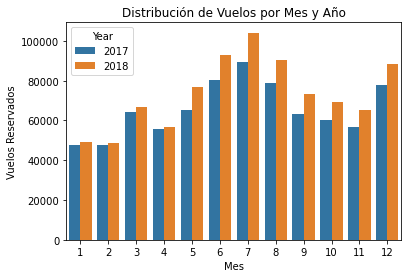

In [197]:
sns.barplot(x='Month', y='Flights Booked', hue='Year', data=distribucion_vuelos);
plt.xlabel("Mes")
plt.ylabel("Vuelos Reservados")
plt.title("Distribución de Vuelos por Mes y Año");

In [ ]:
#Tanto en 2018 como en 2017 el mes con más vuelos es julio

2.¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

#Son dos variables númericas que tenemos que ver relación. Realizamos un gráfico de dispersión para ello

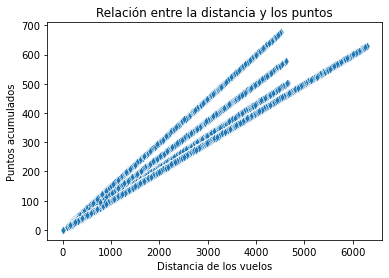

In [52]:
sns.scatterplot(x = "Distance", 
            y = "Points Accumulated", 
            data = df_final_copia, 
            marker = "d")

# cambiamos los nombres de los ejes como hemos estado haciendo hasta ahora
plt.xlabel("Distancia de los vuelos")
plt.ylabel("Puntos acumulados")

# ponemos título a la gráfica
plt.title("Relación entre la distancia y los puntos");

In [ ]:
#Vemos que hay una relación directa, a más distancia más puntos

3. ¿Cuál es la distribución de los clientes por provincia o estado?

In [68]:
df_clientes_limpio =df_final_copia.groupby("Loyalty Number").first().reset_index()

In [ ]:
# Para que no se dupliquen los resultados filtramos por número de cliente y cogemos el primero

In [69]:
df_clientes_limpio

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,0,0,2017,1,3,0,3,1521,152.0,0,0,92552.000000
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,0,0,2017,1,10,4,14,2030,203.0,0,0,79371.732902
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,0,0,2017,1,6,0,6,1200,120.0,0,0,79371.732902
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,0,0,2017,1,0,0,0,0,0.0,0,0,63253.000000
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,0,0,2017,1,0,0,0,0,0.0,0,0,91163.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,Canada,Ontario,Toronto,M1R 4K3,Male,College,Married,Aurora,7290.07,Standard,2014,5,0,0,2017,1,8,6,14,3234,323.0,0,0,79371.732902
16733,999911,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,Single,Nova,8564.77,Standard,2012,8,0,0,2017,1,0,0,0,0,0.0,0,0,217943.000000
16734,999940,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,Married,Nova,20266.50,Standard,2017,7,0,0,2017,1,0,0,0,0,0.0,0,0,47670.000000
16735,999982,Canada,British Columbia,Victoria,V10 6T5,Male,College,Married,Star,2631.56,Standard,2018,7,0,0,2017,1,0,0,0,0,0.0,0,0,79371.732902


In [ ]:
# Hacemos un countplot porque es una variable categórica (Province)

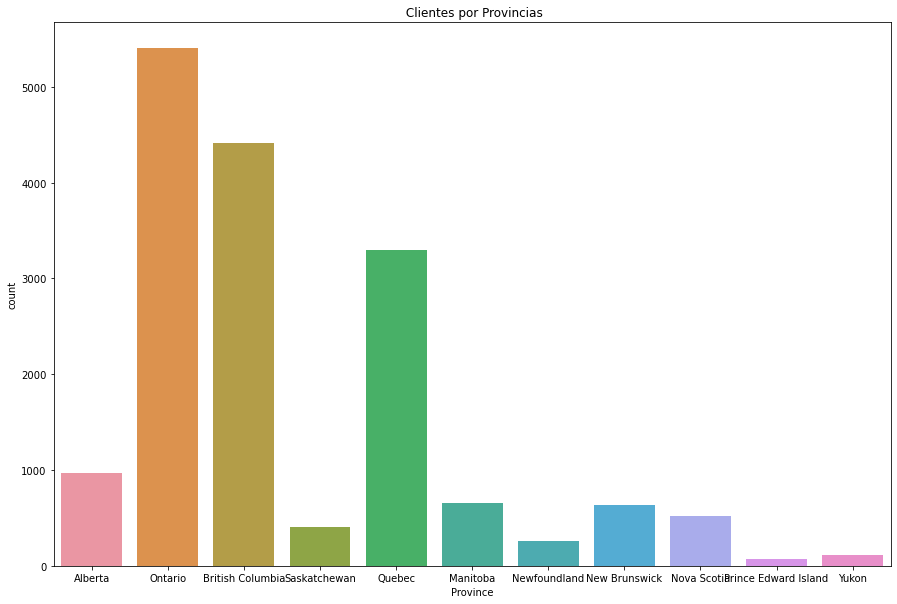

In [81]:
plt.figure(figsize=(15, 10))
sns.countplot(x = "Province", data = df_clientes_limpio);
plt.title(" Clientes por Provincias");

In [ ]:
# Como podemos observar los clientes son más numerosos en Ontario y menos en Eqward Island

4.¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [ ]:
#Realizamos un barplot para ver la relación entre una variable categórica y una numérica

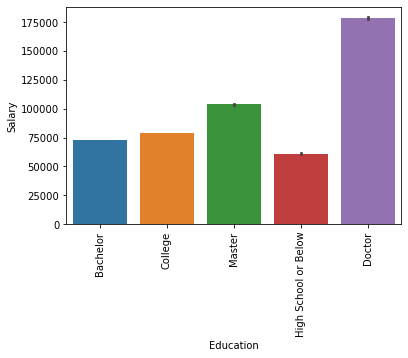

In [150]:
sns.barplot(x = "Education", 
            y = "Salary", 
            data = df_final_copia,         
            )
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90);

In [ ]:
# Los que más cobran son los doctores

5.¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [151]:
df_clientes_limpio 
#utilizamos el df sin clientes repetidos

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed,Salary
0,100018,Canada,Alberta,Edmonton,T9G 1W3,Female,Bachelor,Married,Aurora,7919.20,Standard,2016,8,0,0,2017,1,3,0,3,1521,152.0,0,0,92552.000000
1,100102,Canada,Ontario,Toronto,M1R 4K3,Male,College,Single,Nova,2887.74,Standard,2013,3,0,0,2017,1,10,4,14,2030,203.0,0,0,79371.732902
2,100140,Canada,British Columbia,Dawson Creek,U5I 4F1,Female,College,Divorced,Nova,2838.07,Standard,2016,7,0,0,2017,1,6,0,6,1200,120.0,0,0,79371.732902
3,100214,Canada,British Columbia,Vancouver,V5R 1W3,Male,Bachelor,Married,Star,4170.57,Standard,2015,8,0,0,2017,1,0,0,0,0,0.0,0,0,63253.000000
4,100272,Canada,Ontario,Toronto,P1L 8X8,Female,Bachelor,Divorced,Star,6622.05,Standard,2014,1,0,0,2017,1,0,0,0,0,0.0,0,0,91163.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16732,999902,Canada,Ontario,Toronto,M1R 4K3,Male,College,Married,Aurora,7290.07,Standard,2014,5,0,0,2017,1,8,6,14,3234,323.0,0,0,79371.732902
16733,999911,Canada,Newfoundland,St. John's,A1C 6H9,Male,Doctor,Single,Nova,8564.77,Standard,2012,8,0,0,2017,1,0,0,0,0,0.0,0,0,217943.000000
16734,999940,Canada,Quebec,Quebec City,G1B 3L5,Female,Bachelor,Married,Nova,20266.50,Standard,2017,7,0,0,2017,1,0,0,0,0,0.0,0,0,47670.000000
16735,999982,Canada,British Columbia,Victoria,V10 6T5,Male,College,Married,Star,2631.56,Standard,2018,7,0,0,2017,1,0,0,0,0,0.0,0,0,79371.732902


In [155]:
df_tarjetas_unicas= df_clientes_limpio.groupby(['Loyalty Card']).count().reset_index()
# Calculamos los tipos de tarjetas por clientes

In [103]:
df_tarjetas=df_final.groupby(['Loyalty Card'])['Loyalty Number'].count().reset_index()
#

In [ ]:

#Hacemos gráfico de proporciones

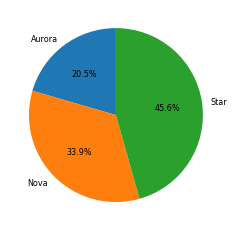

In [157]:
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_tarjetas_unicas, 
        autopct=  '%1.1f%%',          
        textprops={'fontsize': 8}, 
        startangle=90);

In [105]:
df_tarjetas
# Esta opción es sin filtrar los duplicados

,Loyalty Card,Loyalty Number
0,Aurora,83132
1,Nova,136883
2,Star,183745


In [ ]:
# Hacemos un gráfico de proporciones

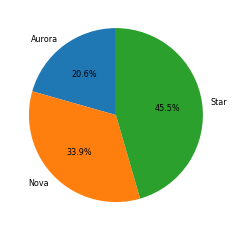

In [106]:
plt.pie("Loyalty Number", labels= "Loyalty Card",
        data = df_tarjetas, 
        autopct=  '%1.1f%%',          
        textprops={'fontsize': 8}, 
        startangle=90);

6.¿Cómo se distribuyen los clientes según su estado civil y género?

In [110]:
#Creamos un dataframe específico de los clientes por género y estado civil.

df_estado_civil= df_final.groupby("Loyalty Number")[["Gender", "Marital Status"]].first().reset_index()

In [118]:
df_estado_civil[["Gender","Marital Status"]].value_counts()

Gender  Marital Status
Female  Married           4869
Male    Married           4866
Female  Single            2272
Male    Single            2212
Female  Divorced          1269
Male    Divorced          1249
dtype: int64

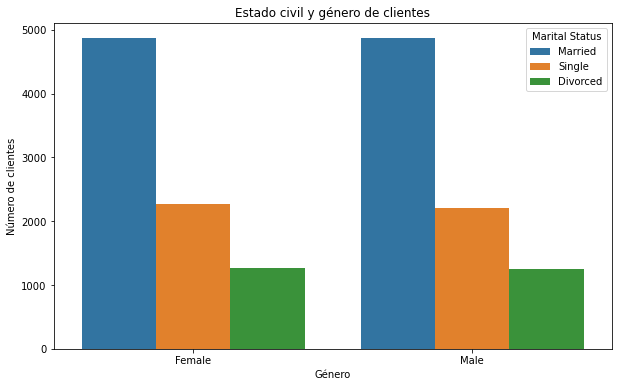

In [115]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Marital Status', data=df_estado_civil)
plt.xlabel("Género") 
plt.ylabel("Número de clientes") 
plt.title('Estado civil y género de clientes')
plt.show()

In [ ]:
# En ambos sexos hay mas casados,seguidos de solteros. Divorciados es la categoria menos numerosa

# Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

#Preparación de datos

In [148]:
df_final_copia.shape

(403760, 25)

In [147]:
df_final_copia["Loyalty Number"].duplicated().sum()

387023

In [119]:
df_estadistico = df_final[['Flights Booked','Education']]

In [120]:
df_estadistico

,Flights Booked,Education
0,3,Bachelor
1,10,College
2,6,College
3,0,Bachelor
4,0,Bachelor
...,...,...
403755,0,College
403756,0,Doctor
403757,3,Bachelor
403758,0,College


In [162]:
media_vuelos= df_estadistico.groupby('Education')['Flights Booked'].mean()

In [207]:
df_estadistico.groupby('Education').describe()

Flights Booked                                          \
                              count      mean       std  min  25%  50%  75%   
Education                                                                     
Bachelor                   252567.0  4.110288  5.221671  0.0  0.0  1.0  8.0   
College                    102260.0  4.169744  5.246040  0.0  0.0  1.0  8.0   
Doctor                      17731.0  4.175512  5.256971  0.0  0.0  1.0  8.0   
High School or Below        18915.0  4.176209  5.239267  0.0  0.0  1.0  8.0   
Master                      12287.0  4.200700  5.213956  0.0  0.0  1.0  8.0   

                            
                       max  
Education                   
Bachelor              21.0  
College               21.0  
Doctor                21.0  
High School or Below  21.0  
Master                21.0

In [163]:
media_vuelos

Education
Bachelor                4.110288
College                 4.169744
Doctor                  4.175512
High School or Below    4.176209
Master                  4.200700
Name: Flights Booked, dtype: float64

In [ ]:
#La media de vuelos de los clientes reservados por cada nivel educativo

In [164]:
desviacion_vuelos= df_estadistico.groupby('Education')['Flights Booked'].std()

In [165]:
desviacion_vuelos

Education
Bachelor                5.221671
College                 5.246040
Doctor                  5.256971
High School or Below    5.239267
Master                  5.213956
Name: Flights Booked, dtype: float64

In [ ]:
#La desviacion estandar de los clientes por nivel educativo

Prueba Estadística:
Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [ ]:
#Para hacer una prueba estadística debemos ver si los datos tenemos que comprobar: normalidad, homogeneidad de las varianzas e interdependencia.
# Los resultados de las pruebas nos haran tomar decisiones sobre la prueba a usar. Si alguna de esas condiciones debe utilizarse una prueba no paramétrica como Test Mann Whitney. Si cumple normalidad dependiendo de nuestros datos elegiremos una de ellas.